## Part 1: Import Statements

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from seaborn import heatmap
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from collections import Counter


from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Part 2: Import processed data

In [2]:
data = pd.read_csv("Data/processed_data.csv", index_col=0)
data = data.dropna()
data


,tweet,class
0,woman shouldnt complain cleaning house man alw...,2
1,boy dats coldtyga dwn bad cuffin dat hoe place,1
2,dawg ever fuck bitch stato cry confused shit,1
3,look like tranny,1
4,shit hear might true might faker bitch told ya,1
...,...,...
25291,yous muthafin lie right tl trash mine bible sc...,1
25292,youve gone broke wrong heababy drove redneck c...,2
25294,young buck wan na eat dat nigguh like aint fuc...,1
25295,youu got wild bitches tellin lies,1


## Part 3: Splitting data 

Splitting data 

In [3]:

#splitting the data into train, test data 0.8, 0.2
X_train, X_test, y_train, y_test = train_test_split(data['tweet'], data['class'],  test_size=0.2, random_state=424)

In [4]:
X_train.sample(5)

2987                           called kidd pussy something
20057    lanait aint nuttin ta fuck bitch dawg frohorsemen
2417                                            crusty hoe
19326                                     dont fucks u hoe
22021          ghetto hoes love feeling nigga abs ya heard
Name: tweet, dtype: object

## Part 4: Feature Extraction

## Count Vectorization

Word n grams: unigrams

In [5]:
#Count Vectorizing the X_train
count_vec = CountVectorizer()
count_vec.fit(X_train)

X_train_count = count_vec.transform(X_train)
X_train_count = X_train_count.toarray()

#Count Vectorizing the X_test
X_test_count = count_vec.transform(X_test)
X_test_count = X_test_count.toarray()

count_vec.vocabulary_

{'august': 864,
 'alsina': 382,
 'deserved': 4249,
 'niggah': 11141,
 'grand': 6822,
 'opening': 11610,
 'top': 16909,
 'class': 3013,
 'oriental': 11661,
 'massage': 10081,
 'perfect': 12087,
 'hate': 7212,
 'bitches': 1559,
 'say': 14069,
 'aint': 266,
 'cute': 3863,
 'lol': 9653,
 'trynna': 17186,
 'hits': 7536,
 'blunt': 1741,
 'guy': 7018,
 'talk': 16264,
 'girls': 6601,
 'hoe': 7562,
 'hoes': 7581,
 'whats': 18201,
 'going': 6697,
 'pussies': 12914,
 'im': 8044,
 'asking': 754,
 'boy': 1928,
 'questions': 12996,
 'like': 9463,
 'bitch': 1545,
 'wan': 17956,
 'na': 10866,
 'nigga': 11134,
 'trinna': 17122,
 'savings': 14060,
 'account': 63,
 'omg': 11544,
 'imma': 8060,
 'funny': 6320,
 'ass': 764,
 'man': 9959,
 'thats': 16521,
 'real': 13201,
 'shit': 14553,
 'ignorant': 8004,
 'cement': 2626,
 'headed': 7271,
 'hillbilly': 7494,
 'said': 13960,
 'taxing': 16347,
 'cant': 2453,
 'fuckin': 6252,
 'read': 13193,
 'fucking': 6253,
 'knob': 9009,
 'gobbling': 6672,
 'douchebag': 468

Vocabulary of train and test set with respective counts

In [6]:
words = []
amounts = []
for key, value in count_vec.vocabulary_.items():
    words.append(key)
    amounts.append(value)

word_counts = pd.DataFrame(words, columns = ["words"])
word_counts["amounts"] = amounts

In [7]:
word_counts.sort_values(by = "amounts", ascending = False, inplace = True)

TFIDF Vectorization

In [8]:
#TFIDF Vectorizing the X_train

tfidf = TfidfVectorizer()

X_train_tf = tfidf.fit_transform(X_train)
X_train_tf = X_train_tf.toarray()

#TFIDF Vectorizing the X_test
X_test_tf = tfidf.transform(X_test)
X_test_tf = X_test_tf.toarray()


Balancing training data

In [9]:

def oversample(X_train_vectorized, y_train):
    print("Before Oversampling: {}".format(Counter(y_train)))

    # # define oversampling strategy
    oversample = RandomOverSampler(sampling_strategy='all')

    # # fit and apply the transform
    X_train_over, y_train_over = oversample.fit_resample(X_train_vectorized, y_train)
    print("After Oversampling: {}".format(Counter(y_train_over)))
    
    return X_train_over, y_train_over

## Oversampling

Oversampling CountVectorized training data

In [10]:
X_train_over_count, y_train_over_count = oversample(X_train_count, y_train)

Before Oversampling: Counter({1: 14738, 2: 3234, 0: 1120})
After Oversampling: Counter({1: 14738, 2: 14738, 0: 14738})


Oversampling TFIDF-Vectorized  training data

In [11]:
X_train_over_tf, y_train_over_tf = oversample(X_train_tf, y_train)

Before Oversampling: Counter({1: 14738, 2: 3234, 0: 1120})


After Oversampling: Counter({1: 14738, 2: 14738, 0: 14738})


## Models

In [12]:
def printModelStats(y_preds, y_test):
    print(classification_report(y_test, y_preds, target_names = ['Hate', 'Offensive', 'Neither']))
    
    cm = confusion_matrix(y_preds, y_test)
    print("The confusion matrix:")
    print(cm)
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] 
    sns.heatmap((cm_percent), annot = True, cmap = "Blues").set(title ="Confusion Matrix Expressed in %")

## Naive Bayes

## Count Vectorization

MultinomialNB and data with CountVectorizations

In [14]:
# Initalising model
nb = MultinomialNB()

# Train and predict
nb.fit(X_train_over_count, y_train_over_count)
y_preds = nb.predict(X_test_count)


              precision    recall  f1-score   support

        Hate       0.21      0.50      0.30       249
   Offensive       0.94      0.86      0.90      3709
     Neither       0.82      0.79      0.80       815

    accuracy                           0.83      4773
   macro avg       0.66      0.72      0.67      4773
weighted avg       0.88      0.83      0.85      4773

The confusion matrix:
[[ 125  398   71]
 [ 100 3193  103]
 [  24  118  641]]


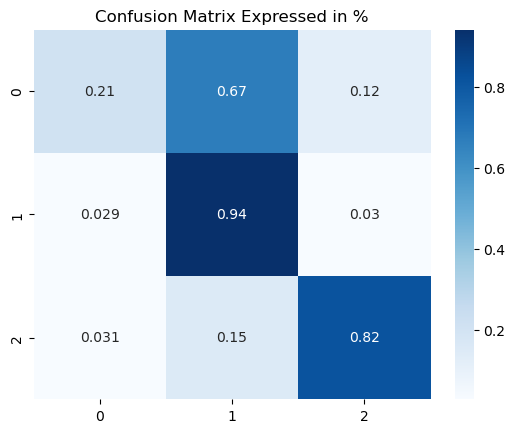

In [15]:
# output statistics
printModelStats(y_preds, y_test)

Gridsearch for optimization

In [ ]:
# param_grid = {
#     ##to do
#     # }

# nb = MultinomialNB(random_state= 424)

# grid_search_nb_count = GridSearchCV(nb, param_grid, cv = 5)
# grid_search_nb_count.fit(X_train_over_count, y_train_over_count)
# grid_search_nb_count.best_params_
    

{'C': 10, 'dual': 'auto', 'penalty': 'l1'}

NB Model with best parameters for Count Vectorizations

In [ ]:
# # Initalising model
# nb = MultinomialNB(random_state= 424)

# # Train and predict
# nb.fit(X_train_over_count, y_train_over_count)
# y_preds = nb.predict(X_test_count)


In [20]:
# # output statistics
# printModelStats(y_preds, y_test)

## TFIDF

Linear SVC and data with TFIDF Vectorizations

In [16]:
# Initalising model
nb = MultinomialNB()

# Train and predict
nb.fit(X_train_over_tf, y_train_over_tf)
y_preds = nb.predict(X_test_tf)



              precision    recall  f1-score   support

        Hate       0.18      0.51      0.26       249
   Offensive       0.93      0.82      0.87      3709
     Neither       0.77      0.76      0.77       815

    accuracy                           0.79      4773
   macro avg       0.63      0.70      0.63      4773
weighted avg       0.87      0.79      0.82      4773

The confusion matrix:
[[ 127  510   73]
 [  99 3035  120]
 [  23  164  622]]


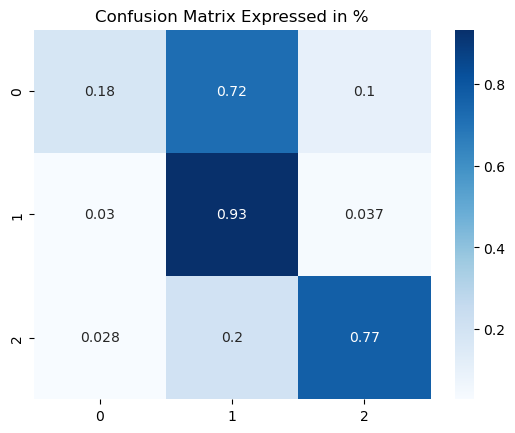

In [17]:
# output statistics
printModelStats(y_preds, y_test)

Grid Search for SVM with TFIDF

In [ ]:
# param_grid = {
#     }

# nb = MultinomialNB(random_state= 424, max_iter = 20000)

# grid_search_svc_tf = GridSearchCV(nb, param_grid, cv = 5)
# grid_search_svc_tf.fit(X_train_over_tf, y_train_over_tf)
# grid_search_svc_tf.best_params_

{'C': 10, 'dual': 'auto', 'penalty': 'l1'}

Optimal model

In [18]:
# # Initalising model
# nb = MultinomialNB()

# # Train and predict
# nb.fit(X_train_over_tf, y_train_over_tf)
# y_preds = nb.predict(X_test_tf)


In [19]:
# # output statistics
# printModelStats(y_preds, y_test)